# **Simple RNN with PyTorch**

In [0]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
x = torch.linspace(0,799,800)

In [0]:
y = torch.sin(x*2*np.pi/40)

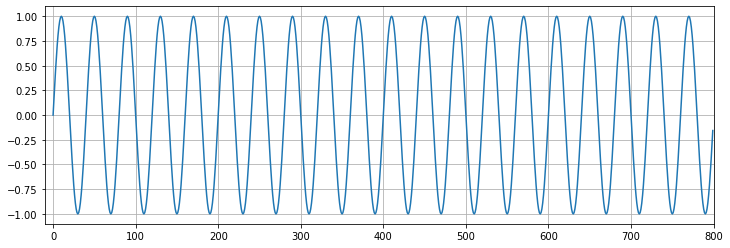

In [26]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

In [0]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

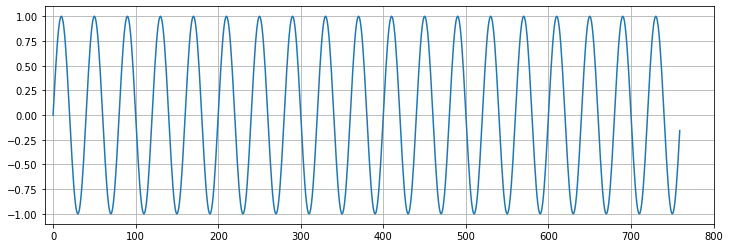

In [28]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())


In [0]:
def input_data(seq,ws):

  out = []

  L = len(seq)

  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window, label))

  return out

In [0]:
window_size = 40

train_data = input_data(train_set,window_size)

In [31]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,  7.0711e-01,
          5.8779e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01, -8.7423e-08,
         -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5106e-01, -8.9101e-01, -8.0902e-01, -7.0711e-01,
         -5.8779e-01, -4.5399e-01, -3.0902e-01, -1.5643e-01,  1.7485e-07]),
 tensor([0.1564]))

In [0]:
class LSTM(nn.Module):

  def __init__(self,input_size=1,hidden_size=50,out_size=1):
      """
      input size: we only have one
      hidden size: number of units in the neuron
      out_size: nº of values predicted per sequence. In our case 1

      """
      super().__init__()
      self.hidden_size = hidden_size

      self.lstm = nn.LSTM(input_size,hidden_size)
      self.linear = nn.Linear(hidden_size,out_size)
      
      self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))

  def forward(self,seq):

      lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)

      pred = self.linear(lstm_out.view(len(seq),-1))

      return pred[-1]


In [0]:
torch.manual_seed(42)
model = LSTM()

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [35]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

Epoch:  1 Loss: 0.09209900
Loss on test predictions: 0.6073052287101746


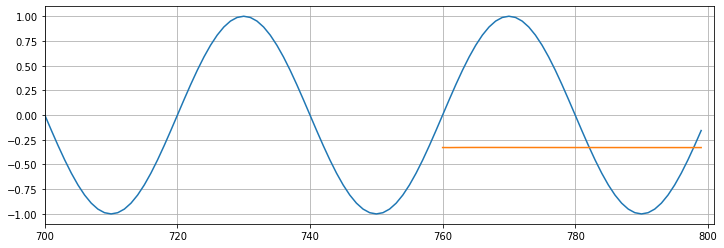

Epoch:  2 Loss: 0.06505248
Loss on test predictions: 0.5652278661727905


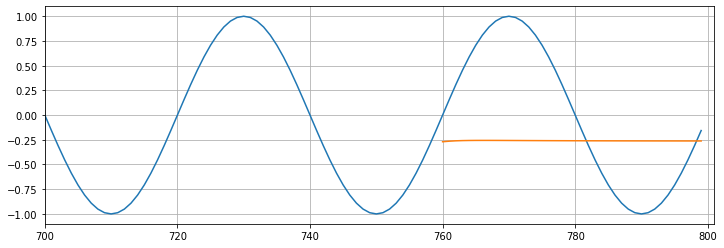

Epoch:  3 Loss: 0.04197341
Loss on test predictions: 0.5200702548027039


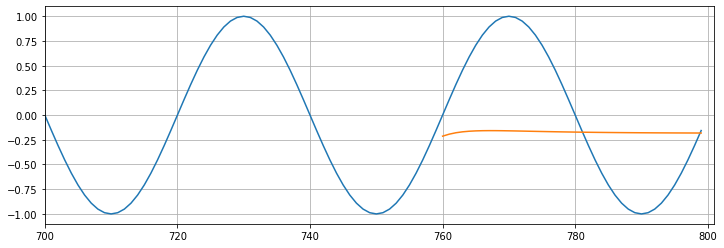

Epoch:  4 Loss: 0.01784235
Loss on test predictions: 0.42215871810913086


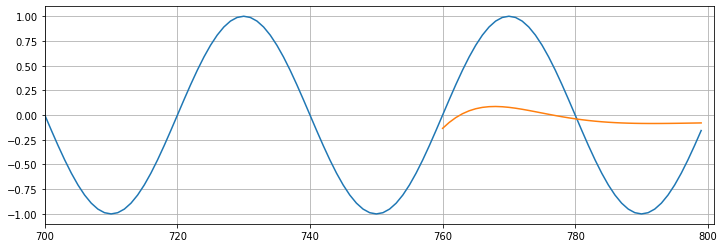

Epoch:  5 Loss: 0.00288905
Loss on test predictions: 0.16624246537685394


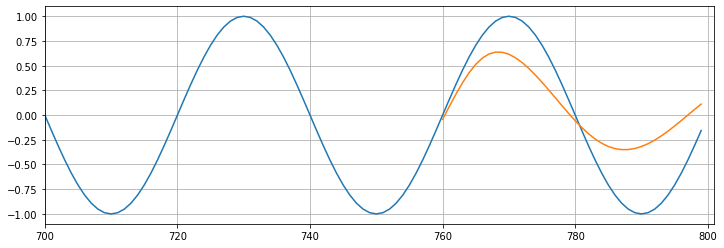

Epoch:  6 Loss: 0.00032107
Loss on test predictions: 0.030550990253686905


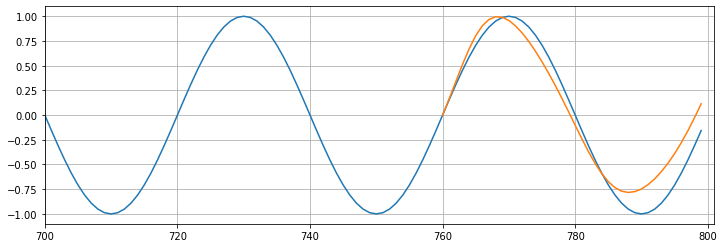

Epoch:  7 Loss: 0.00013035
Loss on test predictions: 0.014989691786468029


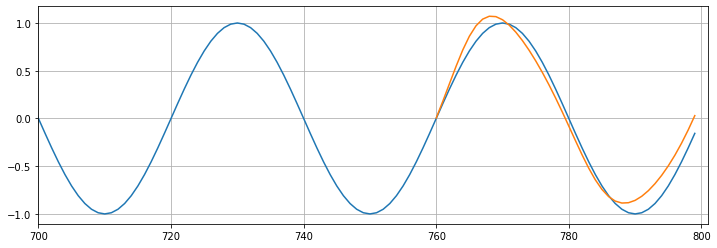

Epoch:  8 Loss: 0.00012068
Loss on test predictions: 0.011856263503432274


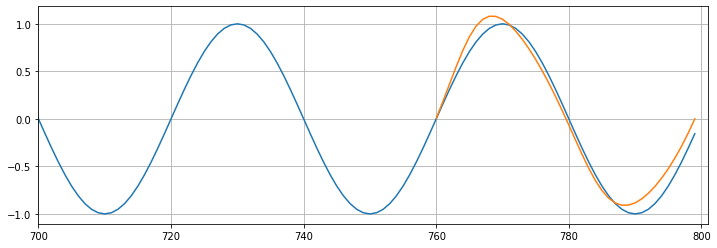

Epoch:  9 Loss: 0.00012717
Loss on test predictions: 0.01016354188323021


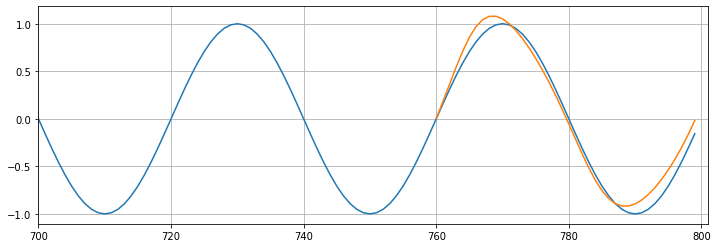

Epoch: 10 Loss: 0.00013256
Loss on test predictions: 0.00889730453491211


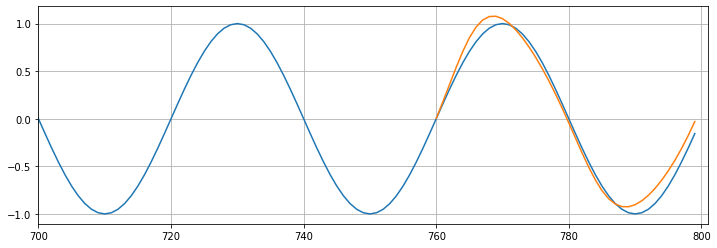

In [36]:
epochs = 10
future = 40

for i in range(epochs):
    
  
    for seq, y_train in train_data:
        
       
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
   
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
   
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

  
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

In [37]:
epochs = 15
window_size=40
future = 40

all_data = input_data(y,window_size)
len(all_data)

760

In [41]:
import time
start = time.time()

for i in range(epochs):
    
  
    for seq, y_train in all_data:
        
       
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
   
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
   
     

Epoch:  1 Loss: 0.00007435
Epoch:  2 Loss: 0.00007055
Epoch:  3 Loss: 0.00006699
Epoch:  4 Loss: 0.00006367
Epoch:  5 Loss: 0.00006057
Epoch:  6 Loss: 0.00005767
Epoch:  7 Loss: 0.00005497
Epoch:  8 Loss: 0.00005245
Epoch:  9 Loss: 0.00005009
Epoch: 10 Loss: 0.00004789
Epoch: 11 Loss: 0.00004583
Epoch: 12 Loss: 0.00004389
Epoch: 13 Loss: 0.00004208
Epoch: 14 Loss: 0.00004038
Epoch: 15 Loss: 0.00003879


## **Forecast into the future**

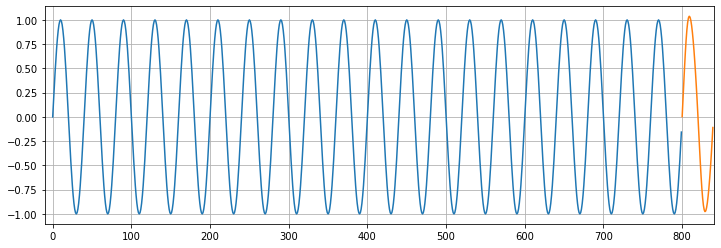

In [44]:
preds = y[-window_size:].tolist()

for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

plt.figure(figsize=(12,4))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[window_size:])
plt.show()